# MEC3456 LAB 04
<sup> version 1.3-Q (from V1.1-A)</sup>

<span style="color:red">This lab should be completed **INDIVIDUALLY**. Collusion will result in a mark of zero. Collusion includes letting others copy your work and plagiarism is using code you did not write yourself without citing the source. Collaborating with others to discuss algorithms and details of Python syntax and structures is acceptable (indeed encouraged), however you **MUST** write your own code. All assignments will be checked using plagiarism-detecting software and similarities in submitted code will result in a human making a decision on whether the similarity constitutes plagiarism.</span>

<span style="color:red">Generative AI tools cannot be used in this assessment task. In this assessment, you must not use generative artificial intelligence (AI) to generate any materials or content concerning the assessment task.</span>


This lab is marked out of 50 and contributes 8% toward your total unit mark for the semester.

**You must provide a pseudo-code of your algorithm in a step-by-step format before the Jupyter cell which contains your code. You also must provide detailed comments on your code, including but not limited to which step in the pseudo-code corresponds to the Python code.**

**Marks will also be deducted for poor coding style, including but not limited to insufficient comments, poor naming of variables, etc. (loss of 5 marks if these requirements are not met)**

Please enter your

**Name:**

**Student ID:**

## Submitting your assignment

- Submit your assignment online using Moodle. 

- Rename your jupyter notebook to `lab0[x]_[StudentID].ipynb`
    - for example `lab01_20000000.ipynb`.

- You should include all assignment answers and codes in this Jupyter Notebook and only submit this file. **Only contents in this file will be marked**.

- Before submitting your assignment, restart the Python kernel and click the "Run all" button on the Jupyter notebook. **Make sure the outputs are as expected, and that there are no errors.** The TAs will run all cells in the Jupyter notebook prior to marking and only the newly generated outputs will be marked, not the outputs submitted with the notebook.

- Code cells that do not run **will be marked as 0**, so please take extra care that everything runs correctly.

- For handwritten sections, please upload a legible photo/scan of your work as an embedded image (links will not be accepted). Latex is also an acceptable answer format.

- **Please ensure that all scanned and embedded images are correctly embedded by downloading your submitted Jupyter Notebook Laboratory to a different empty directory, opening it and checking that all your embedded images are visible. It is your responsability to ensure that a correct and complete Jupyter Notebook Laboratory is submitted.**

In [14]:
# Pre-assignment setup codes. Don't modify this code.
import numpy as np
import matplotlib.pyplot as plt


# Question 1 (10 marks)
In this question we consider the vertical motion of a hot air balloon. The balloon is initially at rest on the ground and the internal air is heated. The vertical motion of the balloon in the air is described by the following differential equation:

\begin{equation}\tag{1}
\frac{dv}{dt} =  \frac{1}{m} \left(  F_{lift} - F_{drag}  \right) - g
\end{equation}

where $v$ is the vertical velocity of the balloon in $m/s$, t is the time in seconds, $g$ is the acceleration due to gravity given in $m/s^2$, and $m$ is the mass of the balloon in $kg$.

The drag force is given by:

\begin{equation}\tag{2}
F_{drag} =  C_d v^2 
\end{equation}

where $C_d$ is the drag coefficient.

The lift force is given by:

\begin{equation}\tag{3}
F_{lift} = C_b t e^{ - C_c v}
\end{equation}

where $C_b$ describes the contribution to the lift due to buoyancy. Assuming the temperature inside the balloon increases linearly with time and the density of the surrounding air remains constant during the ascend, the buoyancy force also increases linearly with time. $C_c$ is a control parameter on the hot balloon controller to prevent the balloon from rising too quickly.

For this question, the parameters are given as follows:
- $m = 1000$ $kg$
- $g = 9.81$ $m/s^2$
- $C_b = 1064$
- $C_c = 0.95$
- $C_d = 135$


### Q1a (3 marks)
Using RK4, determine **BY HAND** the vertical velocity of the balloon at $t = 10.1$ s, given the vertical velocity at $t = 10$ s is $0.58$ m/s. 

Use a step size of $0.1$ s.


**Copy and paste your hand-written response here**

## Q1b (2 marks)
Write a Python function that undertakes "one" timestep of the RK4 method.


**Provide the pseudo code for your algorithm before writing the code.**

In [15]:
def RK4_step(told, vold, frhs, dt):
    '''
    Function to perform a single step of the 4th order Runge-Kutta method.
    input:
    told (double): the current time
    vold (double): the current solution
    frhs (function of t,v): the right-hand-side function of the ODE
    dt (double): the time step
    output:
    vnew (double): the solution at the next time step
    '''
    ## Write your code here

    k1 = frhs(told, vold)
    k2 = frhs(told + dt / 2, vold + dt / 2 * k1)
    k3 = frhs(told + dt / 2, vold + dt / 2 * k2)
    k4 = frhs(told + dt, vold + dt * k3)

    vnew = vold + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    return vnew



## Q1c (5 marks)
Write Python code to accomplish the following tasks:

- Solve Eq (1) using the RK4 method from $t = 0$ until $t = 60$.
- Use different time steps $\Delta t$ of [0.001, 0.005, 0.01, 0.05, 0.1, 0.3].
- Use the trapezoidal rule to calculate the altitude of the balloon at $t = 60$. You may use the trapzoidal integration function provided by the Numpy library.
- For each step size, print the values of $v$ at $t = 60$ and the altitude to 6 decimal places. Provide a proper description on which step size a particular $v$ and altitude is printed.
- In a single figure, produce line plots of the vertical velocity against time for each step size. Provide proper labels and a legend for the plot.
- In a separate figure, plot the final altitude of the balloon for each step size as blue filled circles. Provide proper labels for the plot.

Write a comment about the results and figures. 

Note: As the hot air balloon is initially on the ground, there can't be any negative vertical velocity when $y$ = 0. Implement a check in the simulation and force the veritical velocity to be zero when appropriate.


dt = 0.3: v = 2.976697, altitude = 77.119128
dt = 0.1: v = 1.917875, altitude = 60.939149
dt = 0.05: v = 1.917875, altitude = 60.946333
dt = 0.01: v = 1.917875, altitude = 60.948344
dt = 0.005: v = 1.917875, altitude = 60.948406
dt = 0.001: v = 1.917875, altitude = 60.948426


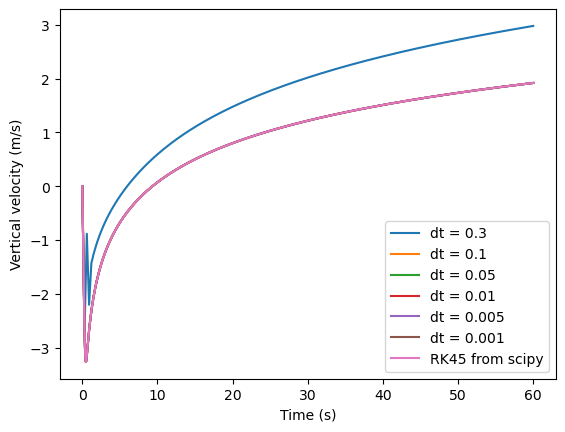

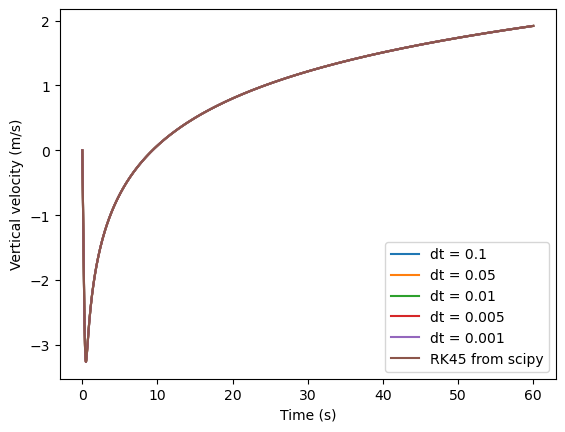

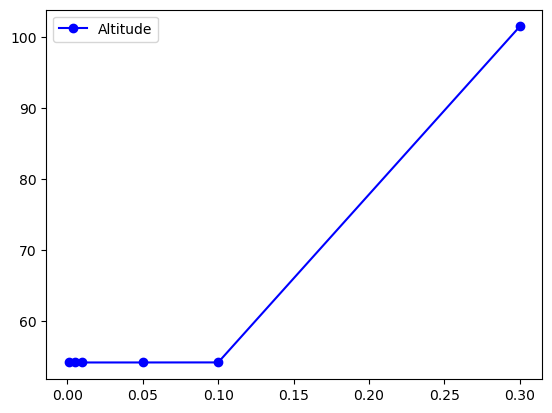

In [16]:
def frhs(t, v):
    '''
    The right-hand-side function of the ODE.
    input:
    t (double): the current time
    v (double): the current solution
    output:
    f (double): the value of the right-hand-side function at time t and solution v
    '''
    ## Write your code here
    m = 1000
    g = 9.81
    Cb = 1064
    Cc = 0.95
    Cd = 135

    Fdrag = Cd * v ** 2
    Flift = Cb * t * np.exp(-Cc * v)

    f = 1 / m * (Flift - Fdrag) - g
    return f


## Write your code here

dts = [0.3, 0.1, 0.05, 0.01, 0.005, 0.001]
res = []
for dt in dts:
    t = np.arange(0, 60 + dt, dt)
    v = np.zeros_like(t)
    v[0] = 0
    for i in range(1, len(t)):
        v[i] = RK4_step(t[i - 1], v[i - 1], frhs, dt)

    res.append((t, v, np.trapz(v, t, dx=dt)))
    print(f"dt = {dt}: v = {v[-1]:.6f}, altitude = {np.trapz(t, v):.6f}")

for r in res:
    plt.plot(r[0], r[1], label=f'dt = {r[0][1] - r[0][0]}')

from scipy.integrate import solve_ivp

sol = solve_ivp(frhs, [0, 60], [0], method="RK45", dense_output=True)
t = np.linspace(0, 60, 1000)
v = sol.sol(t)[0]
plt.plot(t, v, label="RK45 from scipy")
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Vertical velocity (m/s)')
plt.show()

for i, r in enumerate(res):
    if i == 0:
        continue
    plt.plot(r[0], r[1], label=f'dt = {r[0][1] - r[0][0]}')

from scipy.integrate import solve_ivp

sol = solve_ivp(frhs, [0, 60], [0], method="RK45", dense_output=True)
t = np.linspace(0, 60, 1000)
v = sol.sol(t)[0]
plt.plot(t, v, label="RK45 from scipy")
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Vertical velocity (m/s)')
plt.show()

plt.plot(dts, [r[2] for r in res], 'bo-', label='Altitude')
plt.legend()
plt.show()



**Write your comments here**

# Question 2 (12 marks)
In this question, we consider the suspension system of a car. The suspension system can be modelled as a mass-spring-damper system. 

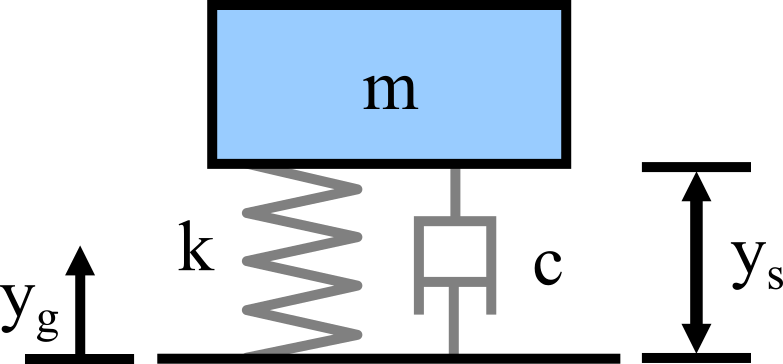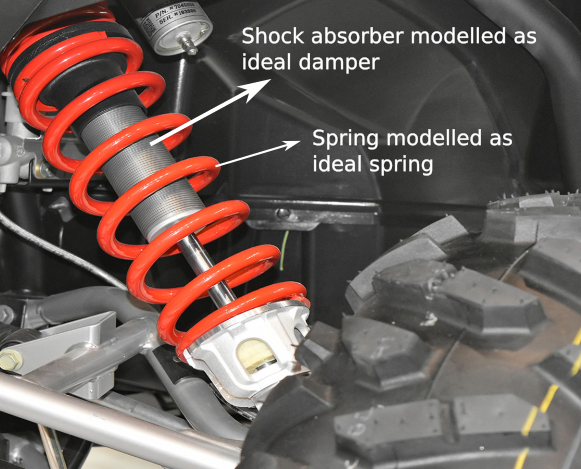

The equation of motion for the system is given by:

\begin{equation}\tag{4}
m \left(\frac{d^2 (y_g + y_s)}{dt^2}\right) = - k (y_s - y_{uncompressed}) - c \frac{dy_s}{dt} - mg
\end{equation}

where $m$ is the average mass of the car per wheel, $k$ is the spring constant, $c$ is the damping coefficient, $y_g$ is the profile of the ground from a reference position, $y_s$ is the length of the suspension system, and $y_{uncompressed}$ is the length of the spring when it is uncompressed.

The parameters are given as follows:
- $m = 400$ kg
- $k = 10000$ N/m
- $c = 1000$ Ns/m
- $g = 9.81$ m/s^2
- $y_{uncompressed} = 1$ m

## Q2a (2 marks)
Recognising that $v=dy_s/dt$ to be the upwards velocity of the car relative to the wheels, transform the second order ODE in Eq (4) into a system of first order ODE. Also calculate the $y_s$ at equilibrium position when the car is stationary.

**Copy and paste your hand-written response here**

## Q2b (2 marks)

Using RK4 with a step size ∆t = 0.1, solve Eq (4) by hand for the position of the car at t = 0.1 s. Let the initial position of the car be $y_s = 1$ m with an initial velocity of $v(0)$ = 0. Use a $y_g = 0$ m.  

**Copy and paste your hand-written response here**

## Q2c (2 marks)
Modify your RK4 function from Q1b so that it will now solve a system of 1st order ODEs for 1 time step.

**Provide the pseudo code for your algorithm before writing the code.**


In [17]:
def RK4_step_sys(told, solold, frhs, dt, ygddot):
    '''
    Function to perform a single step of the 4th order Runge-Kutta method for a system of ODEs.
    input:
    told (double): the current time
    solold (np.array): the current solution, it is a 2x1 array with solold[0] = y and solold[1] = y'
    frhs (function of t, sol, ygddot): the right-hand-side function of the ODE system
    dt (double): the time step
    ygddot (function of t): the function to calculate the acceleration of the ground at a given time, which is passed to frhs function
    output:
    solnew (np.array): the solution at the next time step, it is a 2x1 array with solnew[0] = y and solnew[1] = y'
    '''
    ## Write your code here

    k1 = frhs(told, solold, ygddot)
    k2 = frhs(told + dt / 2, solold + dt / 2 * k1, ygddot)
    k3 = frhs(told + dt / 2, solold + dt / 2 * k2, ygddot)
    k4 = frhs(told + dt, solold + dt * k3, ygddot)

    solnew = solold + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    return solnew

## Q2d (3 marks)

Write a Python code to accomplish the following tasks:
- Let the initial position of the car to be $y_s = 1$ m, $y_g = 0$ m with an initial velocity of $v\left(0\right)$ = 0.
- Solve Eqn (4) for $y_s(t)$ from t = 0 to t = 5 s using the RK4_sys function you have written in Q2c for step sizes ∆t = 0.05, 0.1, 0.3 and 0.5 s.
- Plot the values of $y_s$ against time for each of the ∆t cases.
- Plot a horizontal dashed line at the equilibrium position of the car calculated in Q2a.
- Comment on the behaviour of the car, and also what your observations based on the effects of step size. 



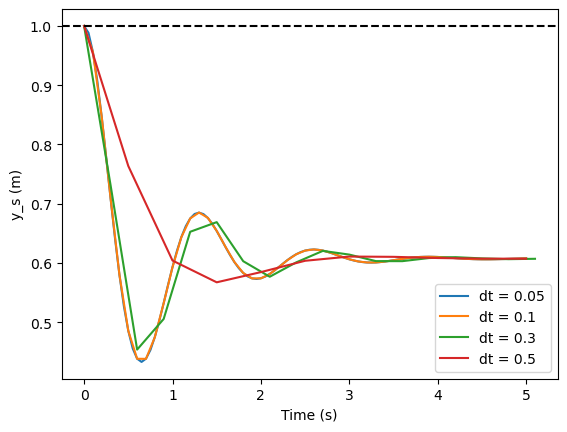

In [18]:
def frhs(t, sol, ygddot):
    '''
    The right-hand-side function of the ODE.
    input:
    t (double): the current time
    sol (np.array): the current solution, it is a 2x1 array with sol[0] = y and sol[1] = y'
    ygddot (function of t): the function to calculate the acceleration of the ground at a given time
    output:
    f (np.array): the values of the right-hand-side function at time t and solution y, it is a 2x1 array
    '''

    ## Write your code here
    m = 400
    k = 10000
    c = 1000
    g = 9.81
    yuncompressed = 1

    f = np.zeros_like(sol)
    f[1] = 1 / m * (-k * (sol[0] - yuncompressed) - c * sol[1] - m * g) - ygddot(t)
    f[0] = sol[1]

    return f


def ygddot(t):  #for question 2d only
    return 0


## Write your code here
delta_t = [0.05, 0.1, 0.3, 0.5]
for delta in delta_t:
    t = np.arange(0, 5 + delta, delta)
    y = np.zeros_like(t)
    v = np.zeros_like(t)
    y[0] = 1
    v[0] = 0
    for i in range(1, len(t)):
        y[i], v[i] = RK4_step_sys(t[i - 1], np.array([y[i - 1], v[i - 1]]), frhs, delta, ygddot)
    plt.plot(t, y, label=f'dt = {delta}')
plt.axhline(1, color='k', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('y_s (m)')
plt.legend()
plt.show()




**Write your comments here**

## Q2e (3 marks)
Write a Python code to accomplish the following tasks:
- 	Set c = 0, 5, 50, 500 and 1000 Ns/m and keep the other parameters the same as in Q2d.
-	Set ∆t = 0.05 s.
-	Solve Eqn (4) for $y_s$(t) from t = 0 to t = 30 s using the using the RK4_step_sys function you have written in Q2c.
-	Plot the values of $y_s$ against time.
-	Comment on the behaviour of the object under oscillation comparing it with the oscillation behaviour in Q2d. How does c modify the solution?  What is happening physically?


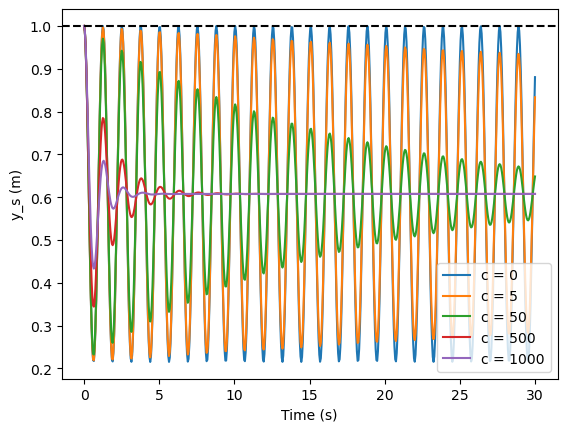

In [19]:
# Write your code here

def _frhs(t, sol, ygddot):
    '''
    The right-hand-side function of the ODE.
    input:
    t (double): the current time
    sol (np.array): the current solution, it is a 2x1 array with sol[0] = y and sol[1] = y'
    ygddot (function of t): the function to calculate the acceleration of the ground at a given time
    output:
    f (np.array): the values of the right-hand-side function at time t and solution y, it is a 2x1 array
    '''

    ## Write your code here
    m = 400
    k = 10000
    g = 9.81
    yuncompressed = 1

    f = np.zeros_like(sol)
    f[1] = 1 / m * (-k * (sol[0] - yuncompressed) - c * sol[1] - m * g) - ygddot(t)
    f[0] = sol[1]

    return f


def ygddot(t):  #for question 2d only
    return 0


## Write your code here
cs = [0, 5, 50, 500, 1000]
delta = 0.05
for c in cs:
    t = np.arange(0, 30 + delta, delta)
    y = np.zeros_like(t)
    v = np.zeros_like(t)
    y[0] = 1
    v[0] = 0
    for i in range(1, len(t)):
        y[i], v[i] = RK4_step_sys(t[i - 1], np.array([y[i - 1], v[i - 1]]), _frhs, delta, ygddot)

    plt.plot(t, y, label=f'c = {c}')
plt.axhline(1, color='k', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('y_s (m)')
plt.legend()
plt.show()




**Write your comments here**

# Question 3 (11 marks)

In this question, we consider the same suspension system as in Q2. However, we now consider the effect of the road profile on the car. The damping coefficient is 1000 Ns/m for this question.

## Q3a (2 marks)
Write a Python function that uses the adaptive step size control RK4 method to solve a system of 1st order ODE with Richardson extrapolation.
Note: You must use your `RK4_step_sys` function from Q2 to perform the individual RK4 steps inside `RK4_adaptive`. Since there will be two solutions, you should take the solution for $y_s$ when determining the optimum step size. You don't need to take a safety factor when calculating the new step size.

**Provide the pseudo code for your algorithm before writing the code.**

In [20]:
def RK4_adaptive(trange, sol_init, f, tol, ygddot):
    '''
    Function to perform adaptive step size Runge-Kutta method with Richardson extrapolation.
    input:
    trange (np.array): a vector with the start and end times [t0, tend]
    sol_init (np.array): the vector of initial values for each dependent variable
    f (function of t, sol, ygddot): the right-hand-side function of the ODE system
    tol (double): the maximum allowable local error (for the solution variable, not its derivative)
    ygddot (function of t): the function to calculate the acceleration of the ground at a given time
    output:
    t (np.array): a vector of the times at which a solution estimate was accepted 
    sol (np.array): a matrix with 2 rows and multiple columns. Each column corresponds to the solution of the dependent variables at the time specified in the vector t.
    dt_list (np.array): the vector of step sizes taken by the adaptive RK4A solver.
    nstep (int): the total number of (accepted) steps taken by the adaptive RK4A solver.
    '''

    def Richardson(a1, a2):
        return 16 / 15 * a2 - 1 / 15 * a1

    dt_list = []
    t = []
    sol = []
    nstep = 0

    t0, tend = trange
    h = tend - t0

    while t0 < tend:
        y1 = RK4_step_sys(t0, sol_init, f, h, ygddot)
        y2 = RK4_step_sys(t0, sol_init, f, h / 2, ygddot)
        y2 = RK4_step_sys(t0 + h / 2, y2, f, h / 2, ygddot)

        y2_richardson = Richardson(y1, y2)
        err = np.abs(y1[0] - y2_richardson[0])

        if err < tol:
            sol_init = y2_richardson
            t0 += h
            nstep += 1

            dt_list.append(h)
            t.append(t0)
            sol.append(y2_richardson)

            h = h * (tol / err) ** 0.20
        else:
            h = h * (tol / err) ** 0.25

    return np.array(t), np.array(sol), np.array(dt_list), nstep

## Q3b (3 marks)
Consider the following road profile:

\begin{equation}\tag{5}
\begin{array}{ll}
y_g &= 0.1 \sin(10\pi t) +\sin(0.2\pi t)\\
\\
\frac{d^2 y_g}{dt^2} &= -10\pi^2 \cos(10\pi t) - 0.04\pi^2 \sin(0.2\pi t)
\end{array}
\end{equation}

Solve equation 4 using the adaptive step size control RK4 method you have written in Q3a from 0 to 5 seconds. Use the initial condition of the car as being stationary at the equilibrium position calculated in Q2a, and a tolerance of $10^{-6}$. Plot the position of the ground, $y_g$, the length of the suspension system, $y_s$ and the position of the car body, $y_c = y_g + y_s$, over time on the same plot. Comment on your result in the plot.

Number of steps taken: 409


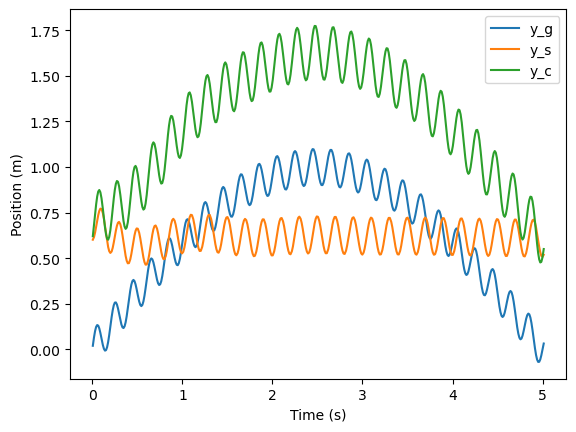

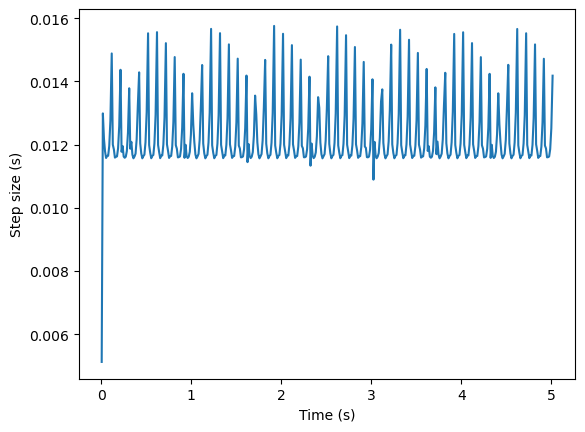

In [21]:
def ygddot(t):
    return -10 * np.pi ** 2 * np.cos(10 * np.pi * t) - 0.04 * np.pi ** 2 * np.sin(
        0.2 * np.pi * t)  ## Write your code here


## Write your code here

t, sol, dt_list, nstep = RK4_adaptive([0, 5], np.array([0.6, 0]), frhs, 1e-6, ygddot)

y_g = 0.1 * np.sin(10 * np.pi * t) + np.sin(0.2 * np.pi * t)

y_s = sol[:, 0]
y_c = y_g + y_s

print("Number of steps taken:", nstep)

plt.plot(t, y_g, label='y_g')
plt.plot(t, y_s, label='y_s')
plt.plot(t, y_c, label='y_c')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.show()

plt.plot(t, dt_list)
plt.xlabel('Time (s)')
plt.ylabel('Step size (s)')
plt.show()




**Write your comments here**


## Q3c (6 marks)
Repeat Q3b with tolerances of [$10^{-1}$, $10^{-3}$, $10^{-5}$,$10^{-7}$]. For each tolerance,
- Print the number of steps taken to solve Eq 3 for each of the tolerance value used
- Plot on the same figure the values of $y_s$ against time for each tolerance value.
- One a separate figure, plot the step size used against time for each tolerance value.
- Create a semilogx plot in a new figure for the number of steps taken to solve the ODE against the tolerance values in log scale. 
- Comment on how the tolerance affects the step size and the number of steps in the adaptive RK4 scheme.

Number of steps taken for tol = 0.1: 41
Number of steps taken for tol = 0.001: 103
Number of steps taken for tol = 1e-05: 264
Number of steps taken for tol = 1e-07: 640


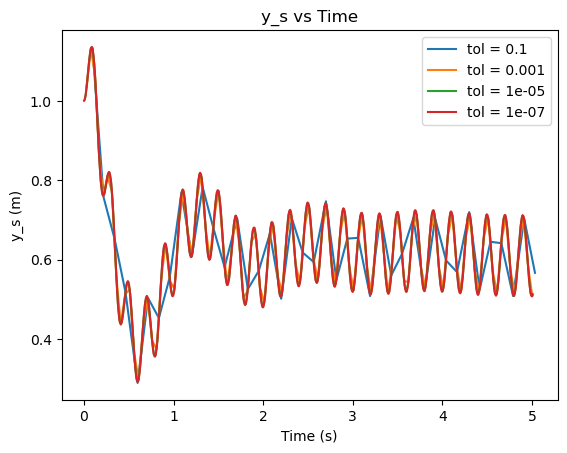

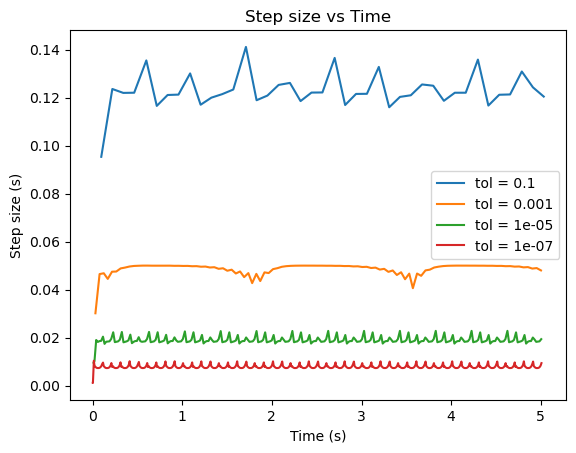

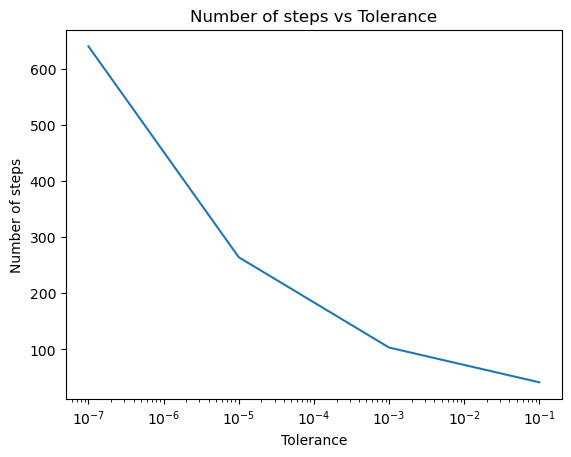

In [22]:
## Write your code here

tols = [1e-1, 1e-3, 1e-5, 1e-7]
ts = []
sols = []
dt_lists = []
nsteps = []

for tol in tols:
    t, sol, dt_list, nstep = RK4_adaptive([0, 5], np.array([1, 0]), frhs, tol, ygddot)
    ts.append(t)
    sols.append(sol)
    dt_lists.append(dt_list)
    nsteps.append(nstep)
    print(f"Number of steps taken for tol = {tol}: {nstep}")
    plt.plot(t, sol[:, 0], label=f'tol = {tol}')
plt.legend()
plt.title('y_s vs Time')
plt.xlabel('Time (s)')
plt.ylabel('y_s (m)')
plt.show()

for i, tol in enumerate(tols):
    plt.plot(ts[i], dt_lists[i], label=f'tol = {tol}')
plt.title('Step size vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Step size (s)')
plt.legend()
plt.show()

plt.semilogx(tols, nsteps)
plt.title('Number of steps vs Tolerance')
plt.xlabel('Tolerance')
plt.ylabel('Number of steps')
plt.show()



**Write your comments here**

# Question 4 (17 marks)
Consider the following stiff ODE:

\begin{equation}\tag{6}
\frac{dy}{dt}=250-22y-10e^{-2t}
\end{equation}

over the range t = 0.0 to t = 5.0 with an initial condition y(0) = 1.0.  The exact solution to Eq 6 is

\begin{equation}\tag{7}
y\left(t\right)=\frac{1}{22} \left( 250 - 217 e^{-22t} - 11 e^{-2t} \right)
\end{equation}


## Q4a (2 marks)
We have learned that the explicit Euler method is stable provided $-2<h\frac{\partial f}{\partial y}<0$. Determine the stability requirement for Eq 6 (assume the step size h>0 and t>0 always).  Write the maximum allowable step size for the explicit Euler method and this equation.  SHOW ALL YOUR WORKING.

**Copy and paste your hand-written response here**

## Q4b (3 marks)
Using the Implicit Euler method, set up a numerical scheme to solve Eq 6. If the stability criterion for the implicit Euler method is $-1<\frac{1}{1-h\frac{\partial f}{\partial y}}<1$, perform a stability analysis of the implicit Euler method when solving for the ODE in Eq 6. What is the stability criterion? SHOW ALL YOUR WORKING.


**Copy and paste your hand-written response here**

## Q4c (4 marks)
Write two separate Python functions to solve Eq 6 using the explicit and implicit Euler algorithm.  

**Provide the pseudo code for your algorithm before writing the code.**

In [23]:
from scipy.optimize import fsolve


def ExpEuler(trange, yinit, rhs, dt):
    '''
    Function to solve ODE using the explicit Euler method.
    input:
    trange (np.array): a vector with the start and end times [t0, tend]
    yinit (double): the initial value for y
    rhs (function of t, y): the right-hand-side function of the ODE 
    dt (double): the time step
    output:
    t (np.array): a vector of the times of the solution  
    y (np.array): a vector out the solution of the dependent variables at the time specified in the vector t.
    '''

    ## Write your code here

    t0, tend = trange
    t = [t0]
    y = [yinit]

    tmpy = yinit
    while t0 < tend:
        t0 += dt
        tmpy = tmpy + rhs(t0, tmpy) * dt

        t.append(t0)
        y.append(tmpy)

    t = np.array(t)
    y = np.array(y)

    return t, y



**Provide the pseudo code for your algorithm before writing the code.**

In [24]:
def ImpEuler(trange, yinit, dt):
    '''
    Function to solve ODE using the implicit Euler method.
    input:
    trange (np.array): a vector with the start and end times [t0, tend]
    yinit (double): the initial value for y
    dt (double): the time step
    output:
    t (np.array): a vector of the times of the solution  
    y (np.array): a vector out the solution of the dependent variables at the time specified in the vector t.
    '''

    #You need to implement the implicit scheme of the equation in this function
    ## Write your code here

    def f(y1):
        return (250 - 22 * y1 - 10 * np.exp(-2 * t0)) * dt + y0 - y1

    t0, tend = trange
    t = [t0]
    y = [yinit]

    y0 = yinit
    while t0 < tend:
        t0 += dt
        y0 = fsolve(f, y0)

        t.append(t0)
        y.append(y0)

    t = np.array(t)
    y = np.array(y)
    return t, y

## Q4d (4 marks)

Write a Python codes, to solve Eq 6 using the explicit Euler method function that you have written in Q4c. Use three different timesteps that are multiples of the maximum allowable timestep you calculated in Question 4a (use 0.5, 0.95 and 1.05 times this maximum).
- Plot your calculated y vs t AND the analytic solution in 3 separate figures.
- Calculate and print the root mean square error between the Euler solution and the analytic solution for each case.
- Comment on the results in the three figures.


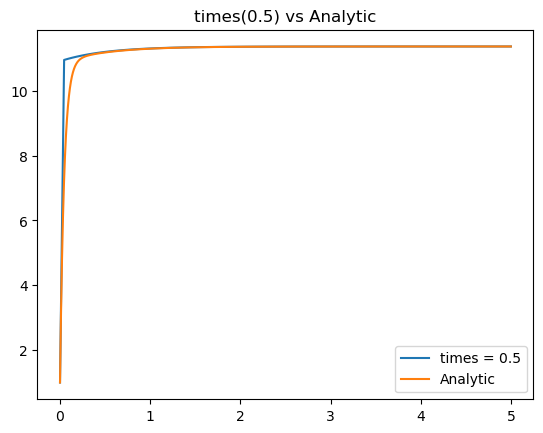

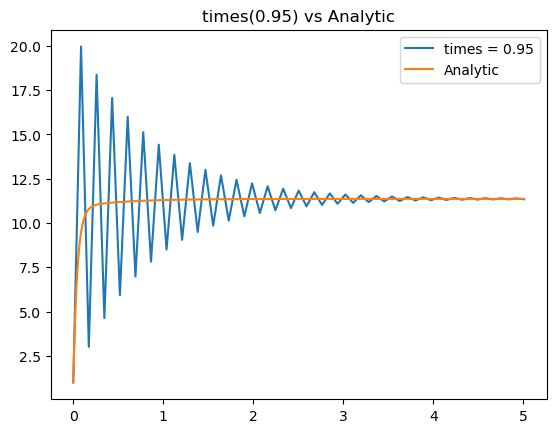

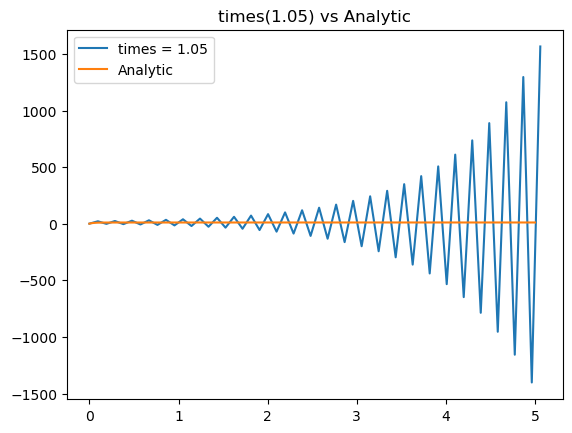

In [25]:
## Write your code here
trange = [0.0, 5.0]

def y(t):
    return 1 / 22 * (250 - 217 * np.exp(-22 * t) - 11 * np.exp(-2 * t))

t = np.arange(0.0, 5.0, 0.001)
y = y(t)


def rhs(t, y):
    return 250 - 22 * y - 10 * np.exp(-2 * t)


max_allow = 1 / 11
dts = [0.5, 0.95, 1.05]
y0 = 1
for dt in dts:
    t_, y_ = ExpEuler(trange, y0, rhs, dt * max_allow)
    plt.plot(t_, y_, label=f'times = {dt}')
    plt.plot(t, y, label='Analytic')
    plt.legend()
    plt.title(f'times({dt}) vs Analytic')
    plt.show()
    


**Write your comments here**


## Q4e  (4 marks)
Repeat Q4d for the implicit Euler method function that you have written in Q4c, using three different time steps of 0.5, 1 and 5 times the maximum allowable timestep you calculated in Question 4a. 
- Plot your calculated y vs t AND the analytic solution in 3 separate figures.
- Calculate and print the root mean square error between the Euler solution and the analytic solution for each case.
- Comment on the results in the three figures and compare the results with the explicit Euler methods and state which one might be better and why.



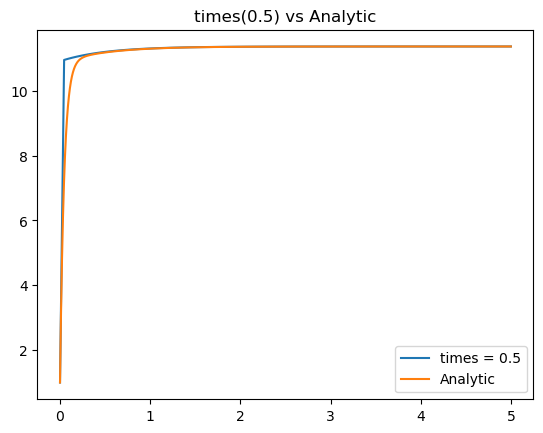

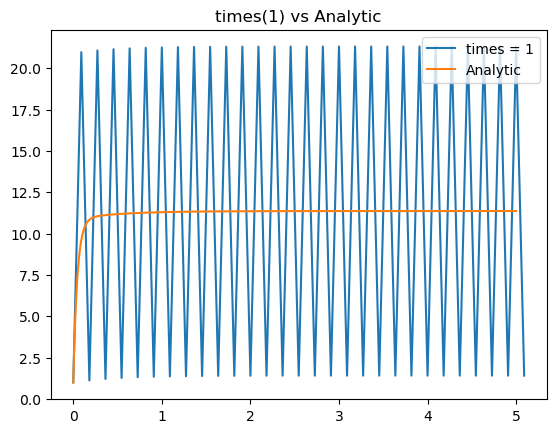

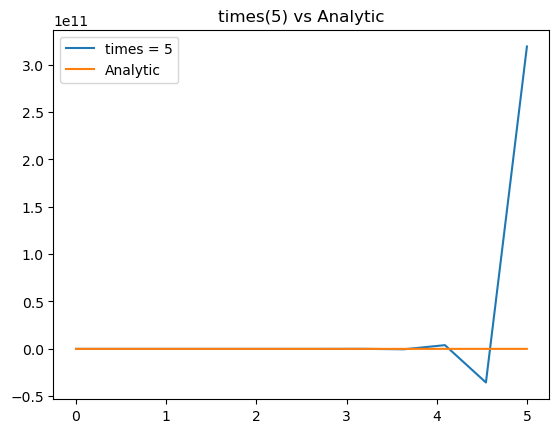

In [26]:
## Write your code here
## Write your code here
trange = [0.0, 5.0]

def y(t):
    return 1 / 22 * (250 - 217 * np.exp(-22 * t) - 11 * np.exp(-2 * t))

t = np.arange(0.0, 5.0, 0.001)
y = y(t)


def rhs(t, y):
    return 250 - 22 * y - 10 * np.exp(-2 * t)


max_allow = 1 / 11
dts = [0.5, 1, 5]
y0 = 1
for dt in dts:
    t_, y_ = ExpEuler(trange, y0, rhs, dt * max_allow)
    plt.plot(t_, y_, label=f'times = {dt}')
    plt.plot(t, y, label='Analytic')
    plt.legend()
    plt.title(f'times({dt}) vs Analytic')
    plt.show()




**Write your comments here**
